# Install Libraries

In [2]:
!pip install PyMuPDF 
!pip install fitz
!pip install pandas
!pip install pdfplumber

   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.4 MB 1.4 MB/s eta 0:00:03
   ---------------------------------------- 0.0/3.4 MB 653.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/3.4 MB 819.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/3.4 MB 711.9 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.4 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.4 MB 1.4 MB/s eta 0:00:03
   ----- ---------------------------------- 0.5/3.4 MB 1.4 MB/s eta 0:00:03
   ------ --------------------------------- 0.6/3.4 MB 1.6 MB/s eta 0:00:02
   -------- ------------------------------- 0.7/3.4 MB 1.7 MB/s eta 0:00:02
   ---------- ----------------------------- 0.8/3.4 MB 1.8 MB/s eta 0:00:02
   ----------- ---------------------------- 1.0/3.4 MB 1.9 MB/s eta 0:00:02
   ------------- -------------------------- 1.2/3.4 MB 2.1 MB/s eta 0:00:02
   ----------

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  Reading version file C:\Users\hp\AppData\Local\Temp\pip-install-jq598k2y\traits_f6bf174715de4a3ca9e9be833c5804dd\traits\version.py
  Package version from version file: ('6.3.2', '6df2ff9bd1d21c74e688aff6f67a19fbbefdd53b')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\traits
  copying traits\api.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\base_trait_handler.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\constants.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\ctrait.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\editor_factories.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\has_traits.py -> build\lib.win-amd64-cpython-311\traits
  copying traits\interface_checker.py -> build\lib.win-amd64-cpython-311\traits
  copy

     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
      --------------------------------------- 0.1/5.6 MB 1.8 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.6 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.3/5.6 MB 1.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.6 MB 2.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.7/5.6 MB 2.4 MB/s eta 0:00:03
     ------ --------------------------------- 0.9/5.6 MB 2.7 MB/s eta 0:00:02
     ------- -------------------------------- 1.0/5.6 MB 2.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.2/5.6 MB 2.9 MB/s eta 0:00:02
     --------- ------------------------------ 1.3/5.6 MB 2.8 MB/s eta 0:00:02
     ---------- ----------------------------- 1.5/5.6 MB 2.8 MB/s eta 0:00:02
     ----------- ---------------------------- 1.6/5.6 MB 2.9 MB/s eta 0:00:02


In [1]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


# Extract Text, Images and Tables from PDF

In [115]:
import fitz  # PyMuPDF
import pdfplumber
import pandas as pd
from PIL import Image
import io
import os

def extract_text_images(pdf_path, images_path):
    with fitz.open(pdf_path) as doc:
        text = ""
        image_paths = []
        for page in doc:
            # Extract text
            page_text = page.get_text().replace('\n', ' ').strip()
            text += page_text + " "
            
            # Extract images and save them
            for img_index, img in enumerate(page.get_images(full=True)):
                base_image = doc.extract_image(img[0])
                image_bytes = base_image["image"]
                image_path = save_image(image_bytes, images_path, len(image_paths))
                image_paths.append(image_path)
                
    return text, image_paths

def extract_tables(pdf_path):
    tables = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            for table in page.extract_tables():
                df = pd.DataFrame(table[1:], columns=table[0])
                tables.append(df.to_dict('records'))  # Convert each table to a list of dictionaries
    return tables


# Create Directory and Save the scrapped Data 

In [118]:
import fitz  # PyMuPDF
import pdfplumber
import pandas as pd
import json
import base64
import os
from PIL import Image
import io

def create_directories(base_dir='scraped_data', images_dir='images'):
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    images_path = os.path.join(base_dir, images_dir)
    if not os.path.exists(images_path):
        os.makedirs(images_path)
    return base_dir, images_path

def save_image(image_bytes, images_path, i):
    image = Image.open(io.BytesIO(image_bytes))
    image_save_path = os.path.join(images_path, f'image_{i}.png')
    image.save(image_save_path)
    return image_save_path


def save_text_to_file(text, base_dir, filename='extracted_text.txt'):
    filepath = os.path.join(base_dir, filename)
    with open(filepath, 'w', encoding='utf-8') as file:
        file.write(text)
    print(f"Text saved to {filepath}")
    
def save_tables(tables, base_dir, filename='extracted_tables.xlsx'):
    # Ensure the directory exists
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    
    filepath = os.path.join(base_dir, filename)
    
    # Save tables to an Excel file with each table in a separate sheet
    with pd.ExcelWriter(filepath) as writer:
        for i, table_data in enumerate(tables):
            # Ensure table_data is a DataFrame
            if not isinstance(table_data, pd.DataFrame):
                table_data = pd.DataFrame(table_data)
            table_data.to_excel(writer, sheet_name=f'Table_{i}')
    print(f"Tables saved to {filepath}")

def save_data_as_json(text, image_paths, tables, base_dir, filename='scraped_data.json'):
    data = {
        'text': text,
        'image_paths': image_paths,
        'tables': tables
    }
    with open(os.path.join(base_dir, filename), 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print(f"Data saved to {os.path.join(base_dir, filename)}")

# Execution

In [119]:
# Main execution
pdf_path = 'C://Users/hp/Downloads/Impossible Distillation from Low-Quality Model to High Quality Datasets.pdf'

base_dir, images_path = create_directories()
text, images = extract_text_images(pdf_path, images_path)
tables = extract_tables(pdf_path)

# Save extracted content
save_text_to_file(text, base_dir)
save_images(images, images_path)
save_tables(tables, base_dir)

# Save all scraped data in JSON format
save_data_as_json(text, image_paths, tables, base_dir)

C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2640350899.py:32: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  tables.append(df.to_dict('records'))  # Convert each table to a list of dictionaries
C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2640350899.py:32: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  tables.append(df.to_dict('records'))  # Convert each table to a list of dictionaries
C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2640350899.py:32: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  tables.append(df.to_dict('records'))  # Convert each table to a list of dictionaries
C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2640350899.py:32: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  tables.append(df.to_dict('records'))  # Convert each table to a list of dictionaries
C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2640350899.py:32: UserWarning: DataFr

Text saved to scraped_data\extracted_text.txt
Image saved to scraped_data\images\image_0.png
Image saved to scraped_data\images\image_1.png
Image saved to scraped_data\images\image_2.png
Image saved to scraped_data\images\image_3.png
Image saved to scraped_data\images\image_4.png
Image saved to scraped_data\images\image_5.png
Image saved to scraped_data\images\image_6.png
Image saved to scraped_data\images\image_7.png
Image saved to scraped_data\images\image_8.png
Image saved to scraped_data\images\image_9.png
Image saved to scraped_data\images\image_10.png
Tables saved to scraped_data\extracted_tables.xlsx
Data saved to scraped_data\scraped_data.json


# Display Scrapped Text

In [135]:
text

'Impossible Distillation: from Low-Quality Model to High-Quality Dataset & Model for Summarization and Paraphrasing Jaehun Jung† Peter West†‡ Liwei Jiang†‡ Faeze Brahman†‡ Ximing Lu†‡ Jillian Fisher† Taylor Sorensen† Yejin Choi†‡ †Paul G. Allen School of Computer Science & Engineering, University of Washington ‡Allen Institute for Artificial Intelligence hoony123@cs.washington.edu Abstract It is commonly perceived that the strongest language models (LMs) rely on a combination of massive scale, instruction data, and human feedback to perform specialized tasks – e.g. summarization and paraphrasing, without supervision. In this paper, we propose that language models can learn to summarize and paraphrase sentences, with none of these 3 factors. We present IMPOSSIBLE DISTILLATION, a framework that distills a task-specific dataset directly from an off-the-shelf LM, even when it is impossible for the LM itself to reliably solve the task. By training a student model on the generated dataset an

# Display Scrapped Images

In [136]:
from IPython.display import Image, display

def display_images(image_paths):
    for image_path in image_paths:
        display(Image(filename=image_path))

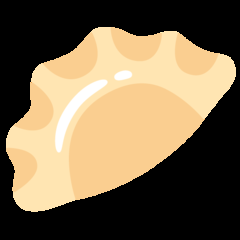

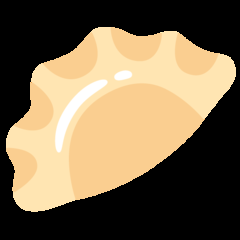

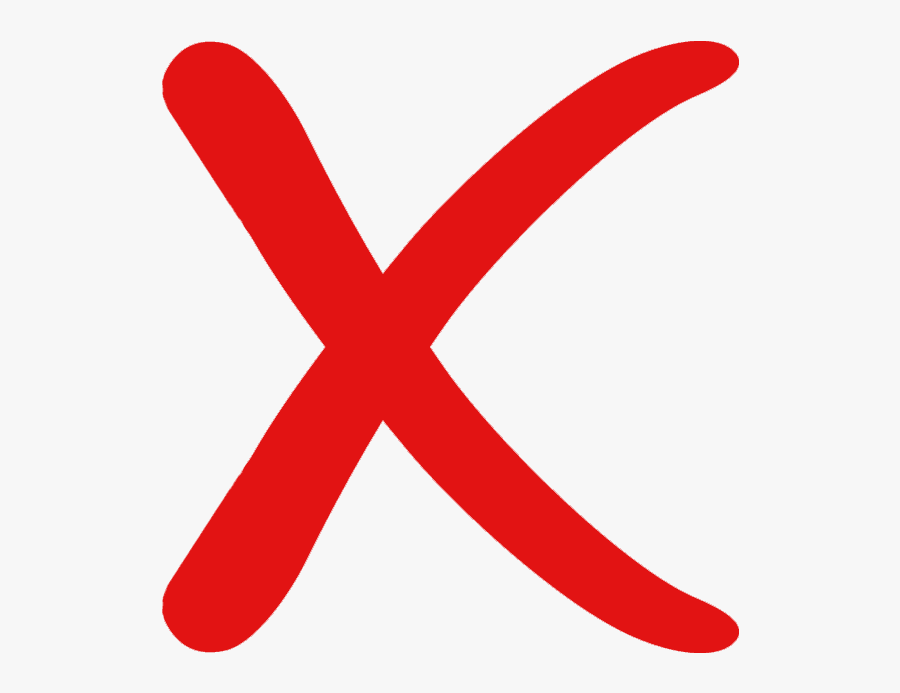

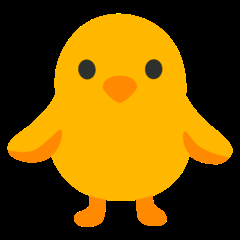

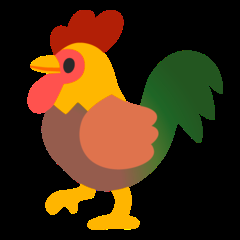

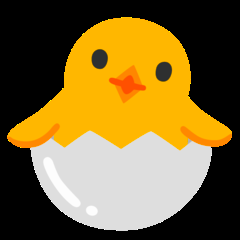

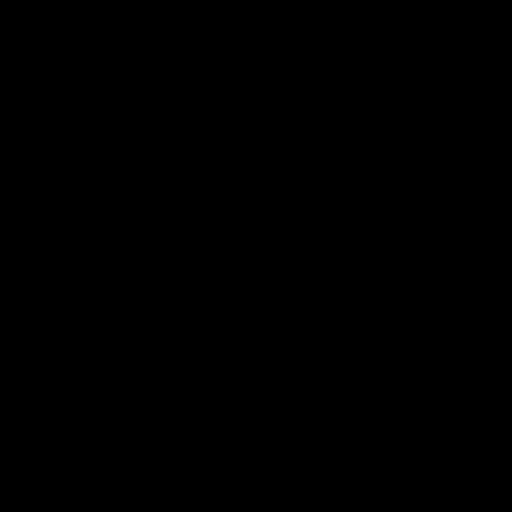

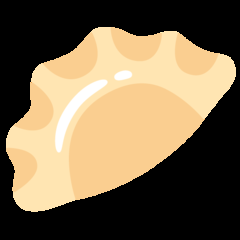

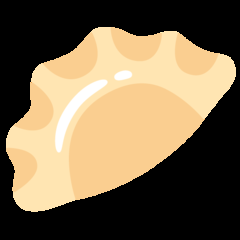

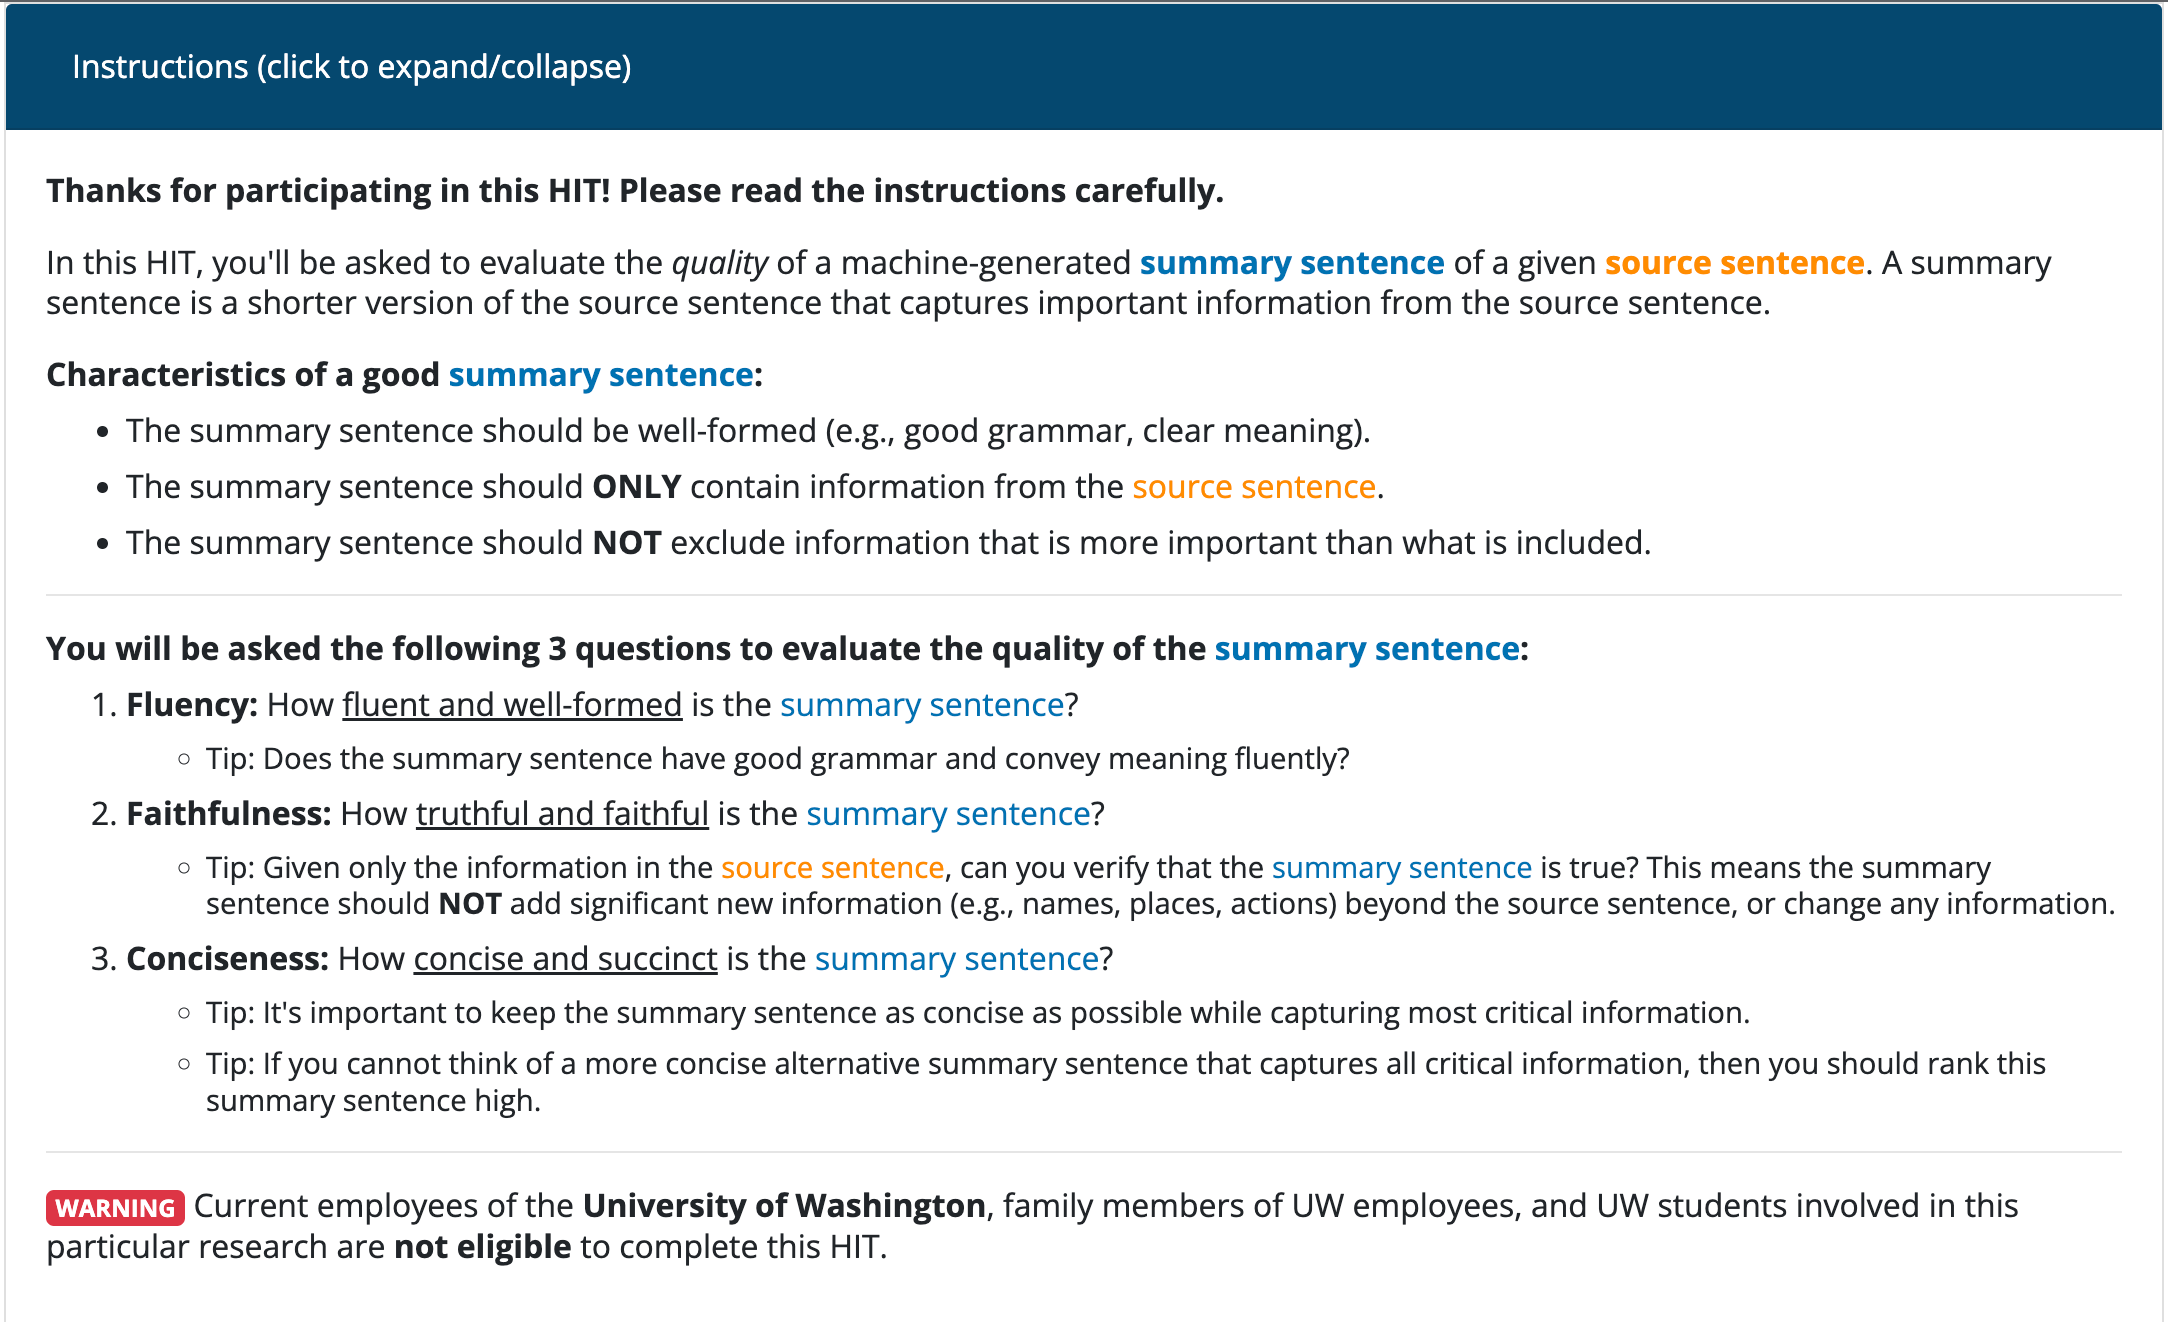

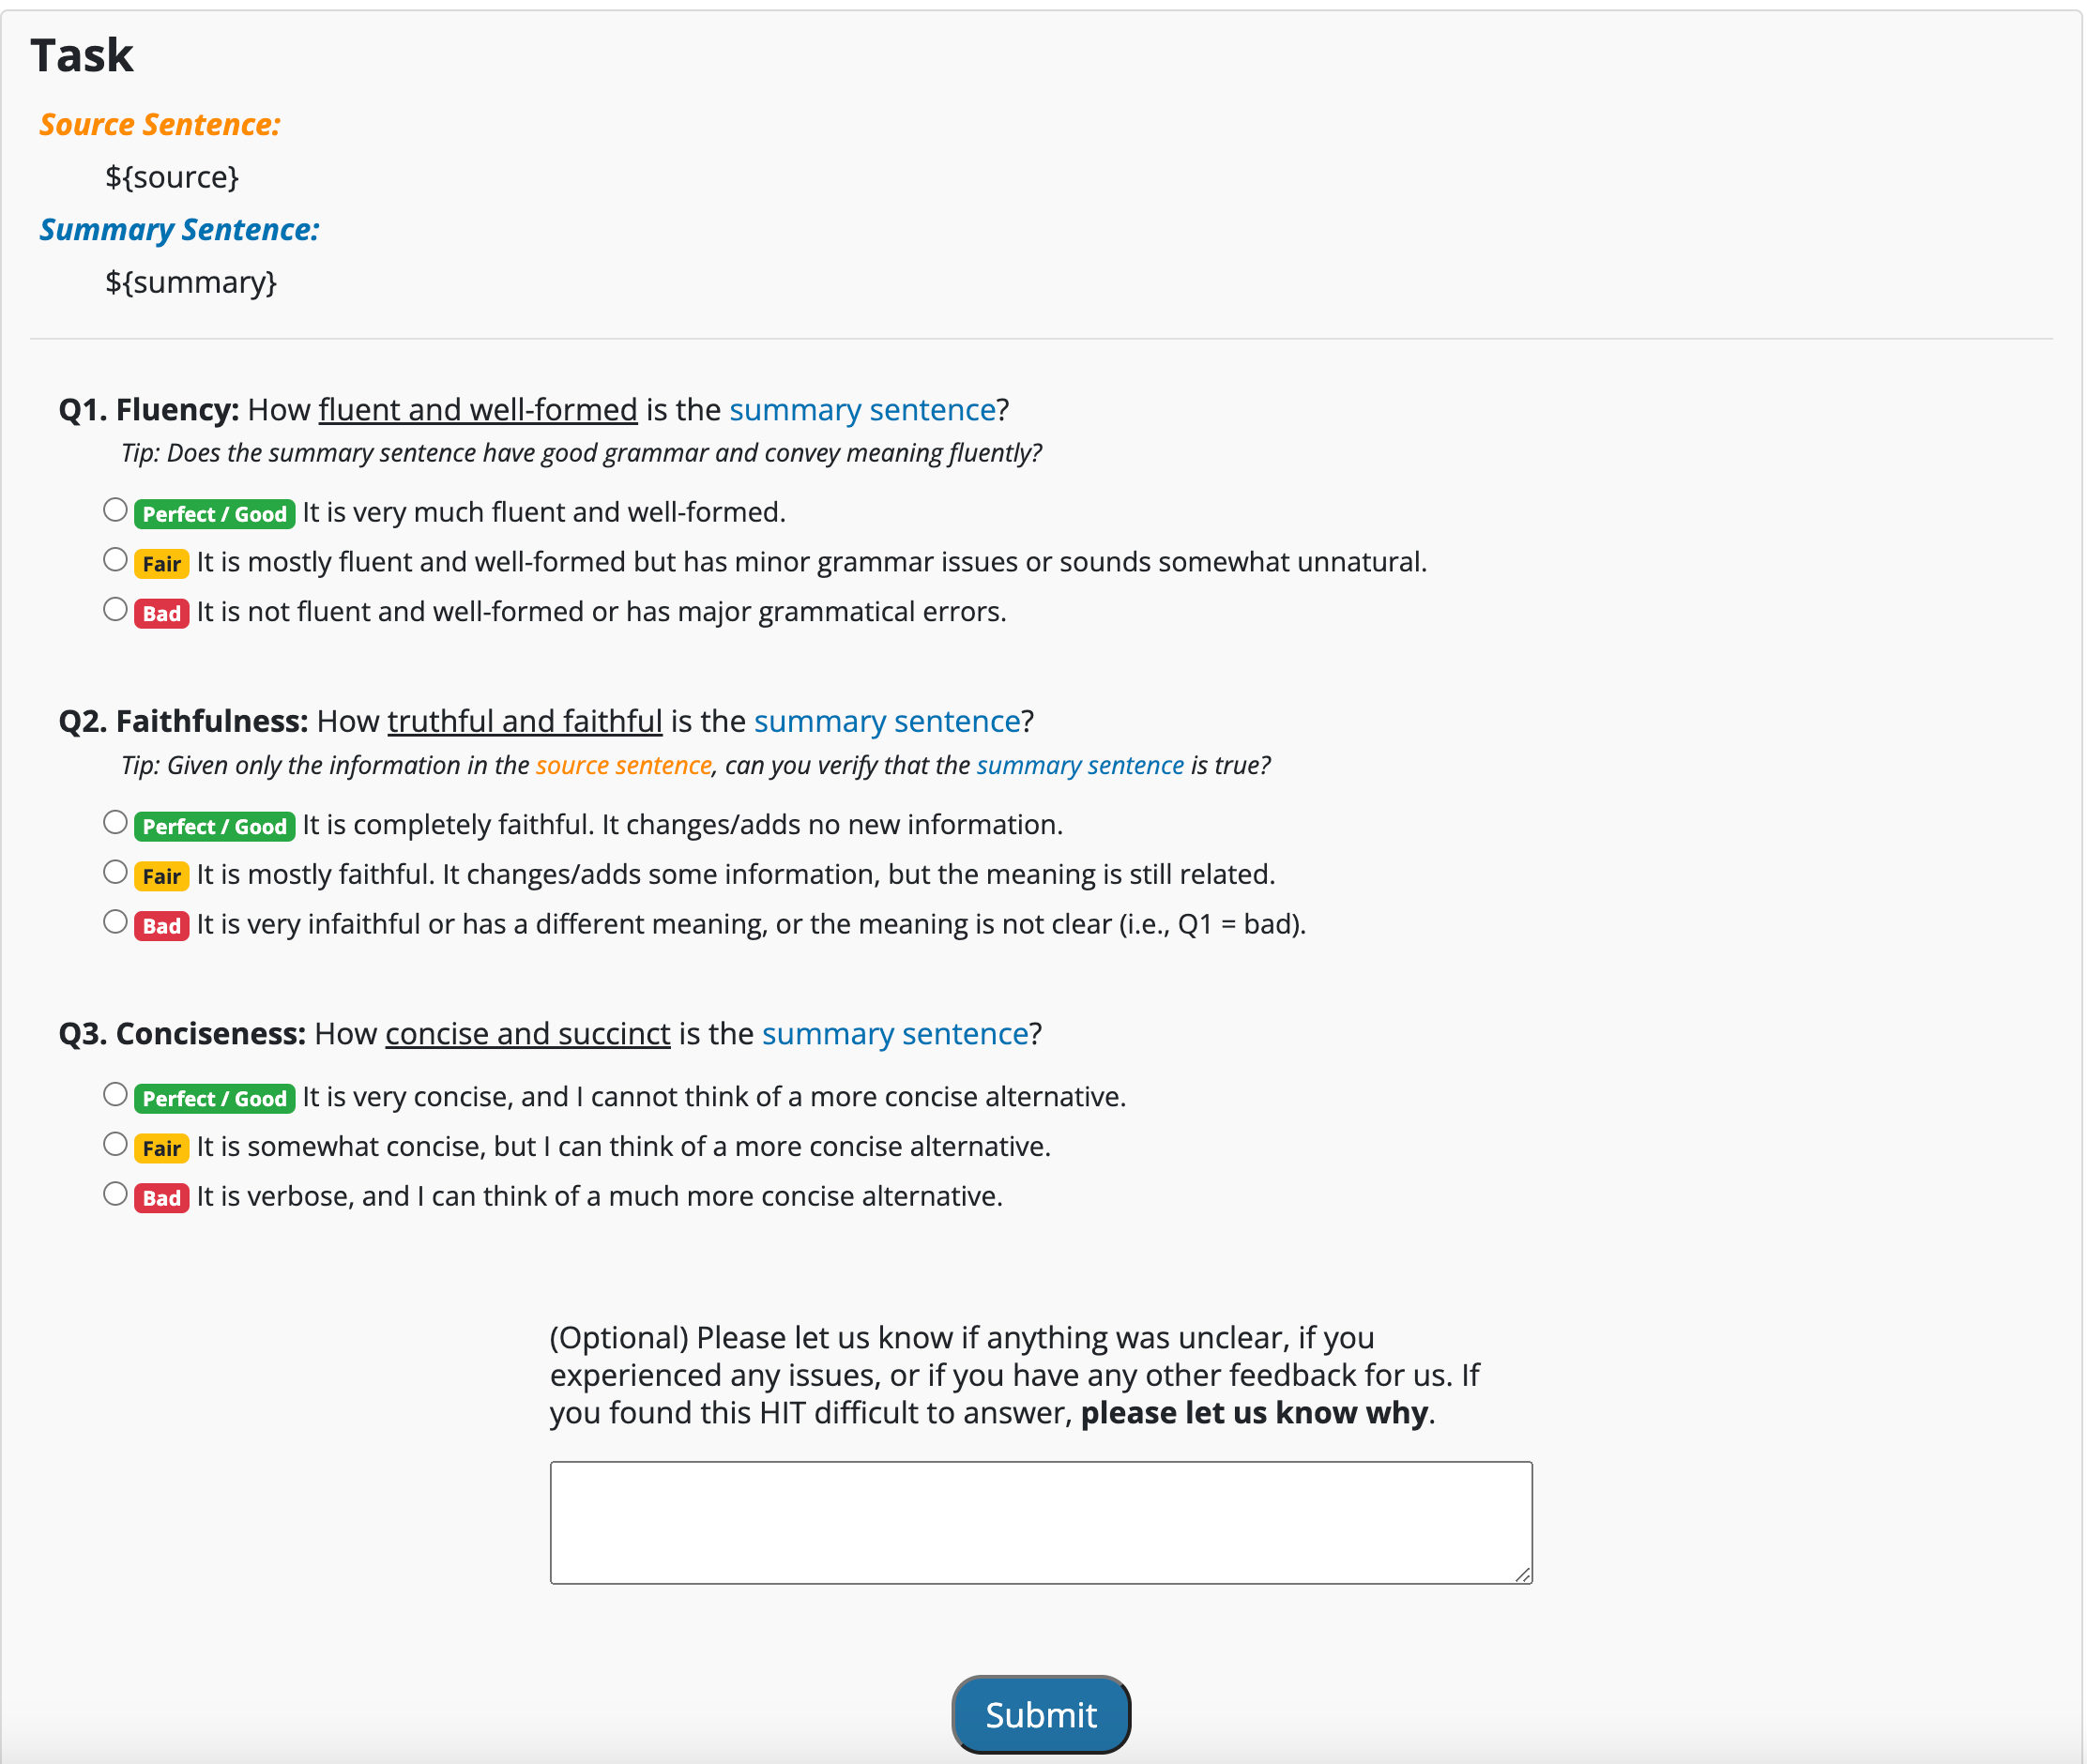

In [137]:
display_images(image_paths)

# Display Scrapped Tables

In [123]:
from IPython.display import display  # Make sure to import this at the top

# Assuming 'tables' is a list of pandas DataFrames
for i, table in enumerate(tables, start=1):
    print(f"Table {i}:")
    display(table)  # Use IPython.display.display to nicely render the DataFrame in Jupyter
    print("\n\n")  # Add some space between tables for readability

Table 1:


,...
0,sk-specific Filters





Table 2:


,None,
0,"Task-specific Filters\nEntailment, Length,\nDi...",None





Table 3:


,None,
0,"Task-specific Filters\nEntailment, Length,\nDi...",ask-specific Filters





Table 4:


,
0,Sentence Pool (Nucleus-sampling)





Table 5:


,
0,Sentence Pool (Nucleus-sampling)





Table 6:


,None,
0,None,
1,None,None
2,,
3,,





Table 7:


,,None
0,None,None
1,1.2\n1.21.2 1.2\nGigaword\n1 11 1 2M\n0.8 0.80...,
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None





Table 8:


,,240k
0,,200k\n160k\n120k
1,,80k\n40k
2,,





Table 9:


,None,"21.22 0.472 Gigaword+In-domain(100%) 60.5 89.6\nDIMSUMonly 62.1 94.2\n21.46 0.511\nDIMSUM+In-domain(50%) 68.3 95.8\nDIMSUM+In-domain(100%) 70.9 96.0\ndatasets. DIMSUM,\nesmorelexicaldi-\nTable5: PerformanceoTfurTk5-largeonQQP\ndatasets. summ\nwithdifferenttrainingconfigurations. 3500\n11 3500 1\n200 200\n,purelytrainedon 350L 0M 0- .8ge30n00era 0t .8edsentences,aregenerallypreferredthan\nan-writtensentences. Theresultsimplythatmerelyrandom-sampling160\n3000 2500 0.6 160 usmaynotsuffic0e 25t 0.o 08c0r.e6ateahigh-qualitydataset;generatingsentences LeguoR\n120 3000 LeguoR\nnddecodingalgorithmco20u00ldb0.4eapromisingalternative,astheLMsare 120\n2000\nectivetorepresent150t0he0h.4u 1m 500an 0t .2extdistribution. 80\n80\n0100.060.2 40\n1000 0 Leg0uoR\nation 500 0 0.2 0.4 0.6 0.8 0 50100 40\n. i6 o 0.8 0 500 Compression Ratio 2500 1000 2000\nequalit0y.8ofourg0en.4eratedLoda 0daingt [aMastheJatx]/ea0x .t 2genasioinns/MsatthMc0e .no4u.jnsvent0io.6nalsu0m.8mar0iz5a0t1i0o0n\n0 1000 2000\nCompression Ratio\nhoreddatasets:Gigaword,TurkandQQP asbaselines,andevaluate\nsumm\nfDIMSUMagainLsotadtinhge [Mmath.Jax]/extensions/MathMenu.js\nhanhuman-aut0ho.r2eddatasets. Weexplorethediversityofsumma- 2000\nandbaselinedatasets. First,wecomparethesummarizationstrategy\npairsintermsofabstractivenessandcompressionratio. InFigure4and\nmarizationstrategy0distributionofthetrainsplitineachdataset,with\nratioasthetwoaxes. Theplotsclearlypresentthesuperiordiversityof 1500\nhoreddatasets. Notably,whileGig0awordconsistsof4Mhu0m.a2n-written 0.4 0.6 0.8\nbiasedtoaveryspecificregionofabstractivenessandcompressionraCtioo. mpression Ratio",,200\n160\n120\n80\n40\n0 50 100
0,None,,None,None
1,None,datasets. DIMSU\nesmorelexicald\ndatasets.,,None
2,None,None,None,None
3,3500\n3000\n2500\n2000\n1500\n0.8,",purelytraine\nan-writtense\nusmaynotsuf",None,None
4,None,nddecodingalgo\nectivetorepresen\nLeg0uoR\nati...,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None





Table 10:


,,None
0,None,None
1,1.2\n1.21.2 1.2\nGigaword\n1 11 1 2M\n0.8 0.80...,
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None





Table 11:


,,240k
0,,200k\n160k\n120k
1,,80k\n40k
2,,





Table 12:


,None,"aledatasetcoveringdiversesummarizationstrategy,asillustratedin\n3500\n11 35T00urk1\n200 200\n3500 0.8 3000 0.8\n160\n3000 2500 0.6 160 LeguoR\n0250.080.6 120 3000 LeguoR\n2000 0.4 120\n2000\n0.4 80\n1500 1500 0.2\n80\n0100.060.2 40\n1000 0 Leg0uoR\n500\n0 0.2 0.4 0.6 0.8 0 50100 40\n. i6 o 0.8 0 500 Compression Ratio 2500 1000 2000\nLoading [MathJax]/extensions/MathMenu.js\n0.8 0.4 0 0.2 0.4 0.6 0.8 0 50 100 0 1000 2000\ntio CComomprepsrseiosns Rioantio Ratio\nnofsummarizatiLoonadinsgt [rMaattheJagx]y/exitnensQionQs/MPathMenu.js(left),Turk(right).\nsumm\n0.2 2000\nShort- Long- Long-\nParaphrase Total\ne Extractive Abstractive Extractive\n0\n60k 168k 17k 18k 3.8M\n1k 29.3k 15.2k - 50.3k 1500\n- - - 0 68.7k 68.7k0.2 0.4 0.6 0.8\n197k 711k 648k 1.33M 3.46M Compression Ratio",,200\n160\n120\n80\n40\n0 50 100
0,None,,None,None
1,None,,,None
2,None,None,None,None
3,3500\n3000\n2500\n2000\n1500\n0.8,,None,None
4,None,Leg0uoR\n.6 0.8 1000 2000\nio\n0.8 0 1000\ntio,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
